In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

# Reading Data

In [2]:
file_dir = Path.cwd()
data_dir = file_dir.parent / 'data'
data = pd.read_csv(data_dir / 'housing.csv')


In [3]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


# Data Exploration

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
data.dropna(inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [7]:
x = data.drop(columns=['median_house_value'])
y = data['median_house_value']

In [8]:
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [9]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [11]:
train_data = x_train.join(y_train)

In [12]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
2718,-115.57,32.80,16.0,2276.0,594.0,1184.0,513.0,1.8750,INLAND,93800.0
17477,-120.05,34.47,21.0,1241.0,248.0,746.0,211.0,3.8056,NEAR OCEAN,425000.0
10911,-117.86,33.73,23.0,407.0,108.0,647.0,96.0,3.7750,<1H OCEAN,177400.0
15757,-122.43,37.77,52.0,1760.0,366.0,742.0,318.0,4.4450,NEAR BAY,400000.0
18426,-121.82,37.25,16.0,2650.0,600.0,1969.0,586.0,3.9461,<1H OCEAN,194300.0
...,...,...,...,...,...,...,...,...,...,...
2796,-118.05,36.64,34.0,2090.0,478.0,896.0,426.0,2.0357,INLAND,74200.0
12843,-121.37,38.69,29.0,2103.0,380.0,1124.0,387.0,3.0833,INLAND,87000.0
8792,-118.45,33.80,31.0,4803.0,575.0,1490.0,577.0,11.9993,NEAR OCEAN,500001.0
12986,-121.30,38.67,23.0,2145.0,340.0,1022.0,349.0,4.2037,INLAND,125400.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

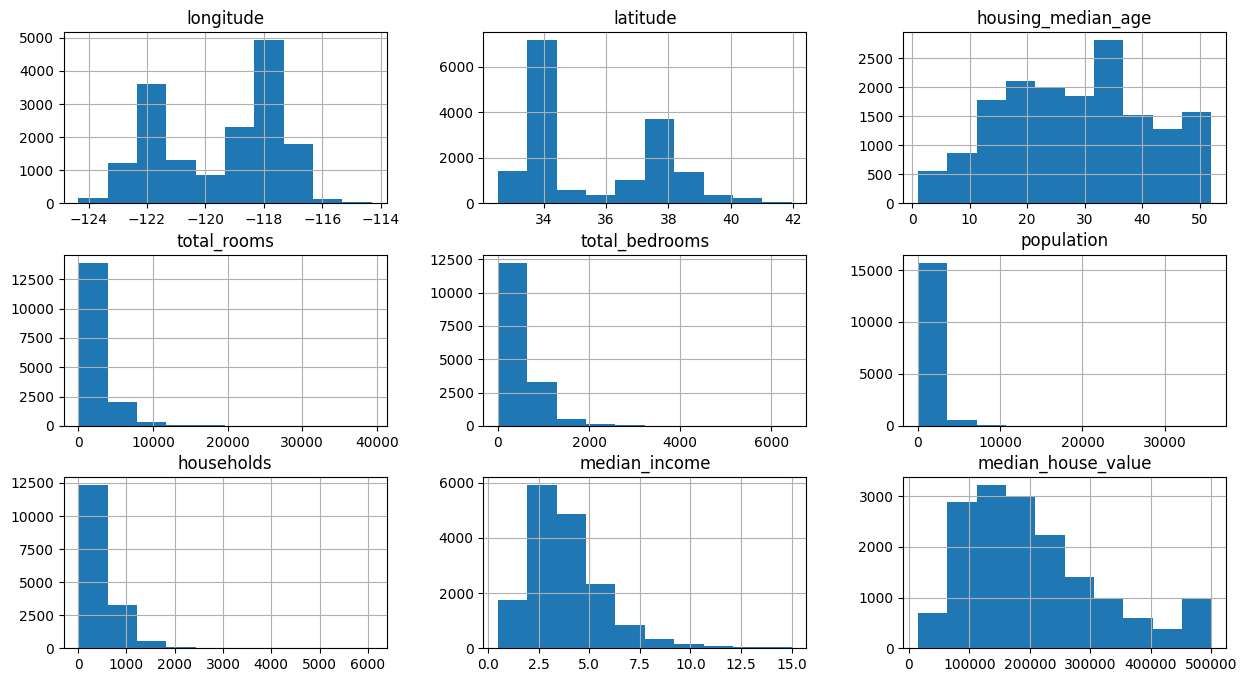

In [13]:
train_data.hist(figsize=(15, 8))

In [14]:
train_data.corr(numeric_only=True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924271,-0.106029,0.045585,0.069963,0.095854,0.055481,-0.019311,-0.048485
latitude,-0.924271,1.000000,0.009530,-0.035757,-0.065822,-0.104490,-0.069199,-0.075937,-0.141922
housing_median_age,-0.106029,0.009530,1.000000,-0.363905,-0.324032,-0.297617,-0.306645,-0.118630,0.103403
total_rooms,0.045585,-0.035757,-0.363905,1.000000,0.931284,0.857232,0.919291,0.194305,0.128829
total_bedrooms,0.069963,-0.065822,-0.324032,0.931284,1.000000,0.876371,0.979616,-0.008572,0.044867
population,0.095854,-0.104490,-0.297617,0.857232,0.876371,1.000000,0.906072,0.004247,-0.028146
households,0.055481,-0.069199,-0.306645,0.919291,0.979616,0.906072,1.000000,0.012670,0.060372
median_income,-0.019311,-0.075937,-0.118630,0.194305,-0.008572,0.004247,0.012670,1.000000,0.689043
median_house_value,-0.048485,-0.141922,0.103403,0.128829,0.044867,-0.028146,0.060372,0.689043,1.000000


<Axes: >

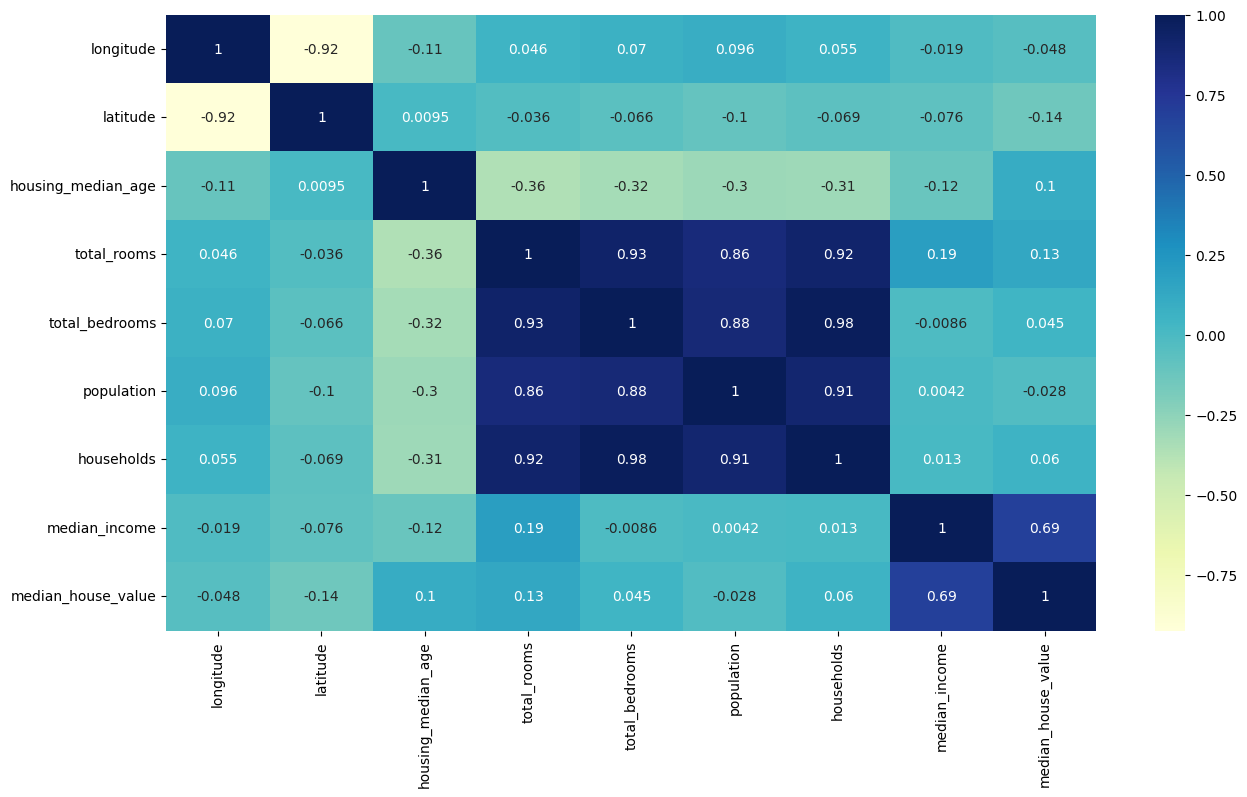

In [15]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap='YlGnBu')

# Pre-Processing

**The 'total_rooms', 'total_bedrooms', 'populations', 'households' these four features seemed to be right skewed, so taking log for those features**

In [16]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

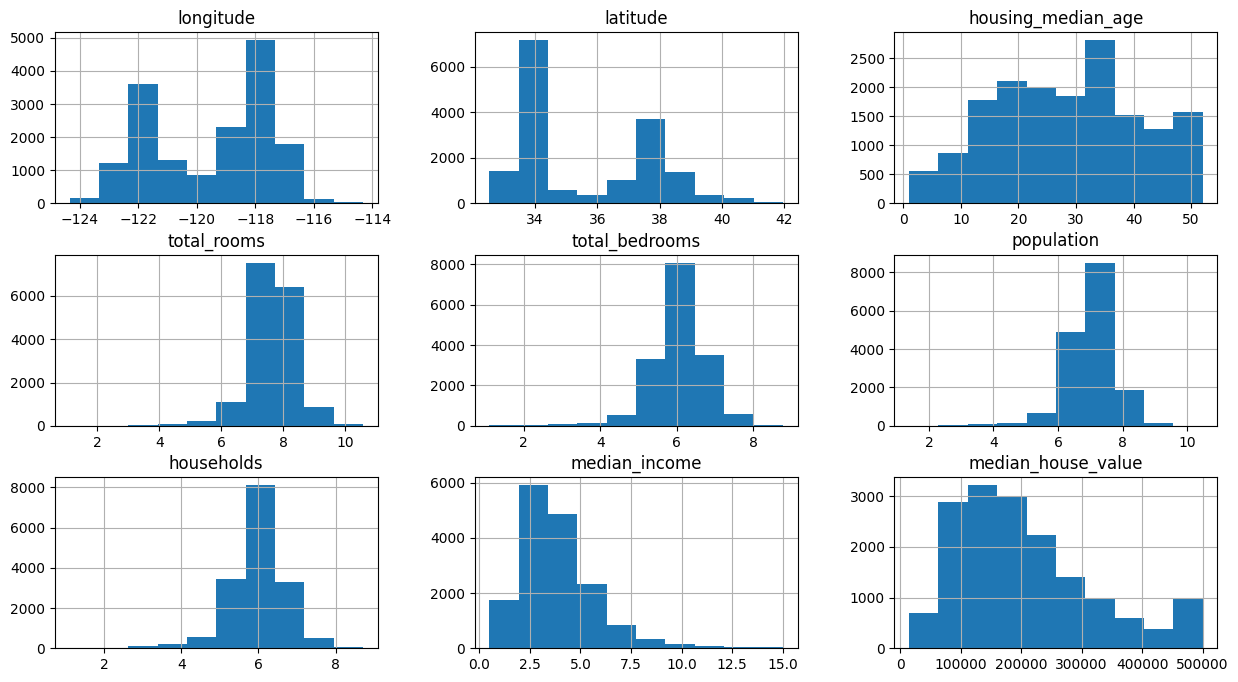

In [17]:
train_data.hist(figsize=(15, 8))

In [18]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7246
INLAND        5183
NEAR OCEAN    2116
NEAR BAY      1797
ISLAND           4
Name: count, dtype: int64

In [19]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(columns=['ocean_proximity'], axis=1)

<Axes: >

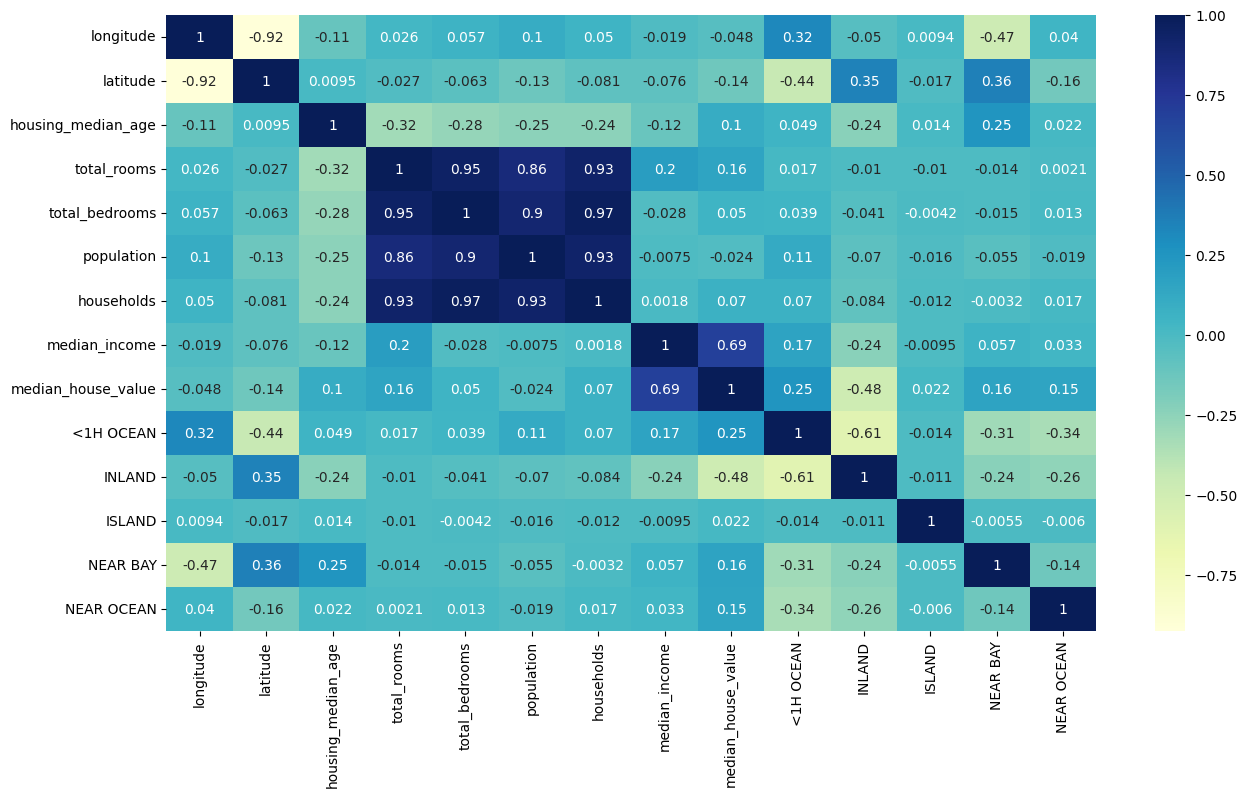

In [20]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap='YlGnBu')

<Axes: xlabel='latitude', ylabel='longitude'>

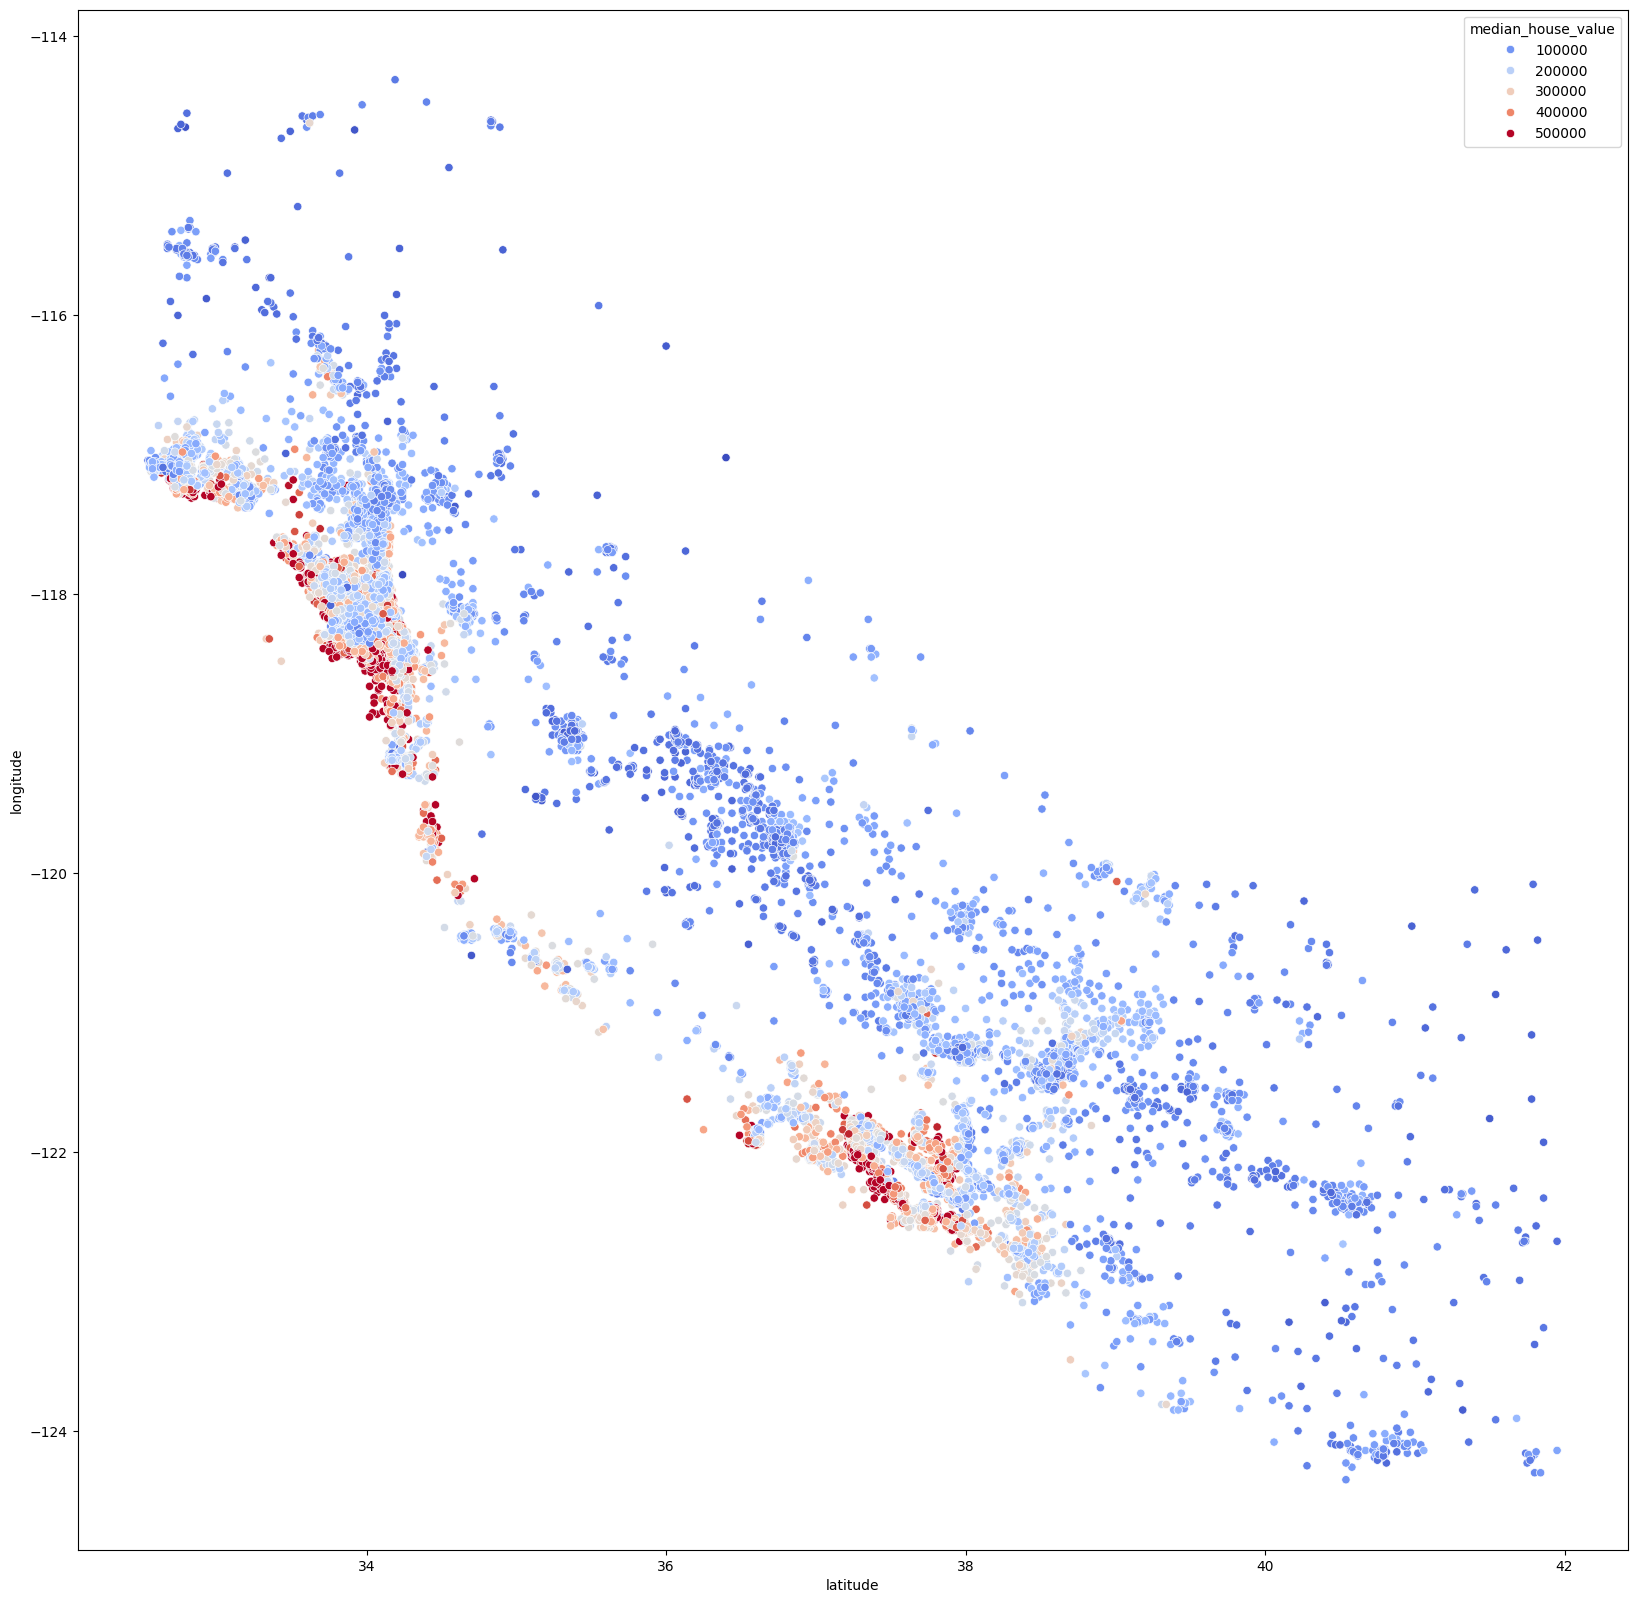

In [21]:
plt.figure(figsize=(20, 20))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='median_house_value', palette='coolwarm')

# Feature engineering

In [22]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
# train_data['population_per_household'] = train_data['population'] / train_data['households']
train_data['rooms_per_household'] = train_data['total_rooms'] / train_data['households']

<Axes: >

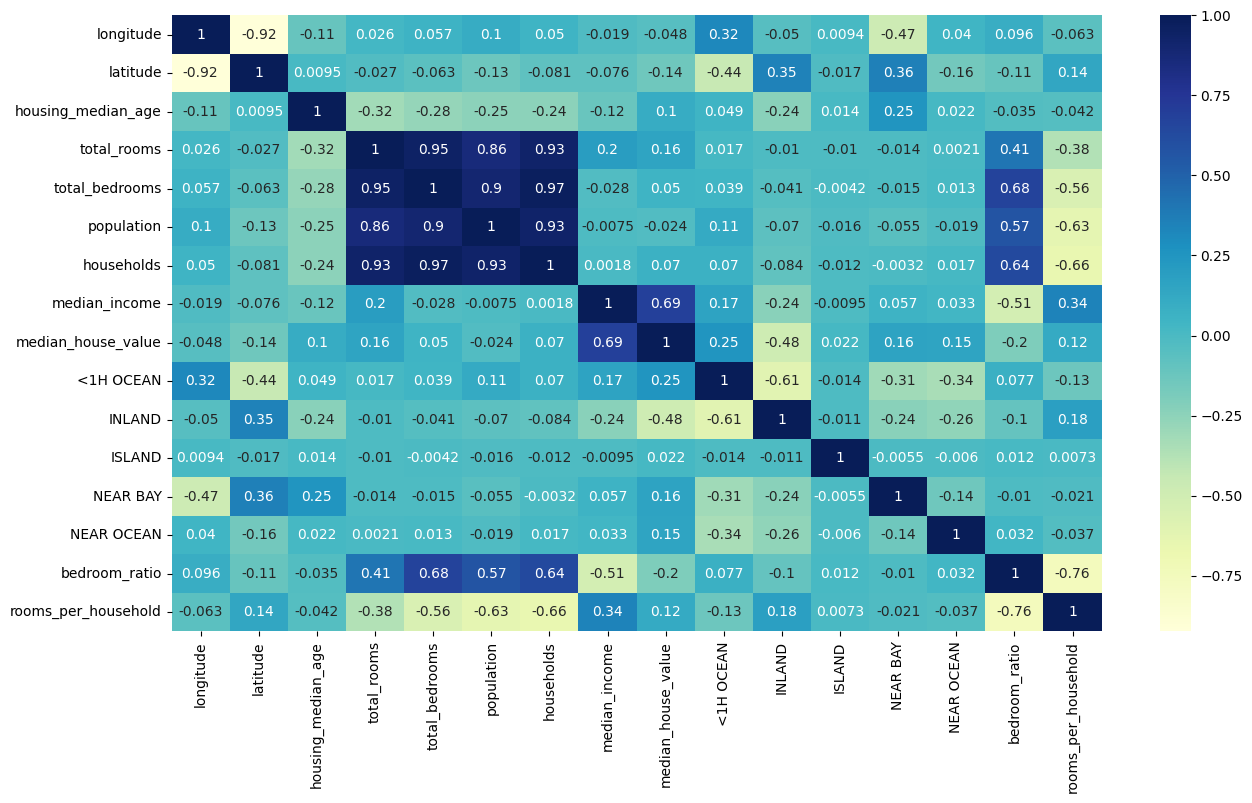

In [23]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap='YlGnBu')

# Training Models

**Linear Regression**

In [24]:
scaler = StandardScaler()

x_train, y_train = train_data.drop(columns=['median_house_value'], axis=1), train_data['median_house_value']
x_train_s = scaler.fit_transform(x_train)


reg = LinearRegression()

reg.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [25]:
test_data = x_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(columns=['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
# test_data['population_per_household'] = test_data['population'] / test_data['households']
test_data['rooms_per_household'] = test_data['total_rooms'] / test_data['households']


In [26]:

x_test, y_test = test_data.drop(columns=['median_house_value'], axis=1), test_data['median_house_value']

In [27]:
x_test_s = scaler.transform(x_test)

In [28]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,rooms_per_household
5042,-118.32,33.98,49.0,7.253470,5.811141,6.804615,5.796058,1.7067,118600.0,True,False,False,False,False,0.801153,1.251449
7446,-118.16,33.93,35.0,6.630683,5.023881,6.163315,4.890349,3.7361,179800.0,True,False,False,False,False,0.757672,1.355871
11191,-117.94,33.82,24.0,8.462948,6.862758,7.863651,6.767343,5.0764,228600.0,True,False,False,False,False,0.810918,1.250557
952,-121.94,37.71,15.0,8.775549,6.935370,7.818028,6.878326,5.0143,271100.0,True,False,False,False,False,0.790306,1.275826
9759,-121.42,36.57,13.0,7.895808,6.432940,7.813996,6.352629,2.8775,134100.0,True,False,False,False,False,0.814728,1.242920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14221,-117.06,32.66,24.0,7.858641,6.198479,7.388946,6.129050,3.5066,133400.0,False,False,False,False,True,0.788747,1.282196
2885,-118.98,35.38,34.0,6.928538,5.513429,6.679599,5.433722,1.6250,50800.0,False,True,False,False,False,0.795756,1.275100
8496,-118.30,33.89,37.0,7.665285,6.338594,7.222566,6.338594,3.2850,218100.0,True,False,False,False,False,0.826922,1.209304
3448,-118.42,34.25,36.0,7.266129,5.805135,7.315218,5.746203,3.6292,145200.0,True,False,False,False,False,0.798931,1.264510


In [29]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,rooms_per_household
2718,-115.57,32.80,16.0,7.730614,6.388561,7.077498,6.242223,1.8750,93800.0,False,True,False,False,False,0.826398,1.238439
17477,-120.05,34.47,21.0,7.124478,5.517453,6.616065,5.356586,3.8056,425000.0,False,False,False,False,True,0.774436,1.330041
10911,-117.86,33.73,23.0,6.011267,4.691348,6.473891,4.574711,3.7750,177400.0,True,False,False,False,False,0.780426,1.314021
15757,-122.43,37.77,52.0,7.473637,5.905362,6.610696,5.765191,4.4450,400000.0,False,False,False,True,False,0.790159,1.296338
18426,-121.82,37.25,16.0,7.882692,6.398595,7.585789,6.375025,3.9461,194300.0,True,False,False,False,False,0.811727,1.236496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2796,-118.05,36.64,34.0,7.645398,6.171701,6.799056,6.056784,2.0357,74200.0,False,True,False,False,False,0.807244,1.262287
12843,-121.37,38.69,29.0,7.651596,5.942799,7.025538,5.961005,3.0833,87000.0,False,True,False,False,False,0.776675,1.283608
8792,-118.45,33.80,31.0,8.477204,6.356108,7.307202,6.359574,11.9993,500001.0,False,False,False,False,True,0.749788,1.332983
12986,-121.30,38.67,23.0,7.671361,5.831882,6.930495,5.857933,4.2037,125400.0,False,True,False,False,False,0.760215,1.309568


In [30]:
reg.score(x_test, y_test)

0.6769387515412917

**Ensemble model with Random Forest**

In [31]:
forest = RandomForestRegressor()

forest.fit(x_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [32]:
forest.score(x_test, y_test)

0.8202202560049853

In [33]:
forest = RandomForestRegressor()

forest.fit(x_train_s, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [34]:
forest.score(x_test_s, y_test)

0.8228577971777175

In [35]:
from sklearn.model_selection import GridSearchCV

param_grid = {    
    'n_estimators': [50, 100, 200],
    'min_samples_split': [2, 5, 10],
    'max_depth': [None, 10, 20, 30],
}

grid_search = GridSearchCV(forest, param_grid, 
                           cv=5, scoring='neg_mean_squared_error', 
                           return_train_score=True)

grid_search.fit(x_train_s, y_train)

,estimator,RandomForestRegressor()
,param_grid,"{'max_depth': [None, 10, ...], 'min_samples_split': [2, 5, ...], 'n_estimators': [50, 100, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,n_estimators,200


In [36]:
best_forest = grid_search.best_estimator_

In [37]:
best_forest.score(x_test_s, y_test)

0.8228172342112307

In [44]:
# Stacking Ensemble: Combine Random Forest, Linear Regression, and Gradient Boosting
from sklearn.ensemble import StackingRegressor, GradientBoostingRegressor

base_learners = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('lr', LinearRegression()),
    ('gb', GradientBoostingRegressor(n_estimators=100, random_state=42))
]

stacking_model1 = StackingRegressor(
    estimators=base_learners,
    final_estimator=RandomForestRegressor(n_estimators=100, random_state=42),
    n_jobs=-1
)

stacking_model1.fit(x_train_s, y_train)
stacking_score1 = stacking_model1.score(x_test_s, y_test)
print(f"Stacking Ensemble R² Score: {stacking_score1:.4f}")

Stacking Ensemble R² Score: 0.7997


In [45]:
from sklearn.ensemble import StackingRegressor, GradientBoostingRegressor, RandomForestRegressor

base_learners = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=100, random_state=42))
]

stacking_model2 = StackingRegressor(
    estimators=base_learners,
    final_estimator=RandomForestRegressor(n_estimators=100, random_state=42),
    n_jobs=-1
)

stacking_model2.fit(x_train_s, y_train)
stacking_score2 = stacking_model2.score(x_test_s, y_test)

print(f"Stacking Ensemble R² Score (no Linear Regression): {stacking_score2:.4f}")


Stacking Ensemble R² Score (no Linear Regression): 0.7856


In [46]:
import joblib

file_dir = Path.cwd()
model_dir = file_dir.parent / 'src'
model_dir.mkdir(exist_ok=True)

joblib.dump(stacking_model1, model_dir / 'stacking_model1.joblib')

joblib.dump(stacking_model2, model_dir / 'stacking_model2.joblib')

joblib.dump(best_forest, model_dir / 'best_forest.joblib')

joblib.dump(forest, model_dir / 'forest.joblib')

['/home/kavin/career/me/kkr_internship/gen_ai/house-price-prediction/src/forest.joblib']

In [47]:
loaded_stacking_mode11 = joblib.load(model_dir / 'stacking_model1.joblib')

loaded_stacking_mode12 = joblib.load(model_dir / 'stacking_model2.joblib')

loaded_forest = joblib.load(model_dir / 'forest.joblib')

loaded_best_forest = joblib.load(model_dir / 'best_forest.joblib')

print(f"Stacked_model score: {loaded_stacking_mode11.score(x_test_s, y_test)}\nStacked_model score: {loaded_stacking_mode12.score(x_test_s, y_test)}\nforest score: {loaded_forest.score(x_test_s, y_test)}\nbest_forest score: {loaded_best_forest.score(x_test_s, y_test)}\n")

Stacked_model score: 0.7996734883293314
Stacked_model score: 0.7856055386309216
forest score: 0.8228577971777175
best_forest score: 0.8228172342112307

